In [1]:
!pip install --upgrade --editable gym-env

Obtaining file:///C:/Users/samru/anaconda3/lectures/CS698_DeepRL/Project/ForagingReplenishingPatches-main/gym-env
  Attempting uninstall: gym-env
    Found existing installation: gym-env 1.0.0
    Uninstalling gym-env-1.0.0:
      Successfully uninstalled gym-env-1.0.0
  Running setup.py develop for gym-env


In [1]:
import gym
import gym_env
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

env = gym.make('foraging-replenishing-patches-v0')

env.reset()
for i in range(300):
    action = np.random.randint(9)
    state, reward, done, _ = env.step(action)
    print(action, state, reward, done)
    if done:
        break

2 2 0 False
4 4 0 False
0 0 0 False
0 0 0 False
7 7 0 False
6 6 0 False
7 7 0 False
2 2 0 False
3 3 0 False
7 7 0 False
2 2 0 False
0 0 0 False
1 1 0 False
2 2 0 False
6 6 0 False
8 6 63.0 False
2 2 63.0 False
7 7 63.0 False
8 7 63.0 False
3 3 63.0 False
5 5 63.0 False
1 1 63.0 False
3 3 63.0 False
8 3 63.0 False
0 0 63.0 False
0 0 63.0 False
5 5 63.0 False
2 2 63.0 False
7 7 63.0 False
7 7 63.0 False
4 4 63.0 False
1 1 63.0 False
4 4 63.0 False
3 3 63.0 False
3 3 63.0 False
3 3 63.0 False
8 3 63.0 False
1 1 63.0 False
6 6 63.0 False
2 2 63.0 False
6 6 63.0 False
1 1 63.0 False
8 1 129.60000000000002 False
2 2 129.60000000000002 False
0 0 129.60000000000002 False
5 5 129.60000000000002 False
4 4 129.60000000000002 False
8 4 199.8 False
2 2 199.8 False
0 0 199.8 False
1 1 199.8 False
5 5 199.8 False
6 6 199.8 False
2 2 199.8 False
1 1 199.8 False
8 1 262.8 False
6 6 262.8 False
0 0 262.8 False
0 0 262.8 False
4 4 262.8 False
0 0 262.8 False
2 2 262.8 False
0 0 262.8 False
2 2 262.8 Fals

#### Exploit or leave decision

In [2]:
def select_action(p, estimated_rewards=[], type='local'):
    if np.random.uniform()<p:
        action=8 #harvest
        state, total_reward, done, _ = env.step(action)
    else:
        if type=='global':
            action= np.random.choice(np.delete(np.arange(8),s)) #select a place randomly
        else:
            action=np.random.choice(np.where(np.delete(estimated_rewards,s)==max(np.delete(estimated_rewards,s)))[0])+1 #select action greedily
        t1=env.time_elapsed
        state, toal_reward, done, _ = env.step(action) #go to a new place
        t2=env.time_elapsed
        d=t2-t1
        state, total_reward, done, _ = env.step(8) #harvest
        total_reward-=d
    return state, total_reward, done

In [3]:
def exploit_or_explore(r,T,c=0.5, beta=0.5):
    
    return 1 / (1 + np.exp(-(c + beta*(r - T)))) #probability of staying

In [10]:
env = gym.make('foraging-replenishing-patches-v0')
env.reset()
s=env.current_state

action=np.random.randint(8) #go to random place
state, current_reward, done, _ = env.step(action)
state, current_reward, done, _ = env.step(8) #harvest
rewards=[current_reward]
print(state,current_reward)

0 0


#### Local Rewards

In [5]:
start_reward=20 #intial local reward for all states
estimated_rewards=np.array([start_reward]*(env.action_space.n-1))
alpha=0.8 #learning rate

while not done:
    estimated_rewards[state]+= alpha*(current_reward-estimated_rewards[state]) #change estimated reward only for current state
    T=max(np.delete(estimated_rewards,state)) #take maximum value available from other states as threshold
    p=exploit_or_explore(current_reward,T,c=0.5, beta=0.5) #get probabilitity of exploiting 
    state, total_reward, done=select_action(p, estimated_rewards)
    rewards.append(total_reward)
    current_reward=rewards[-1]-rewards[-2]

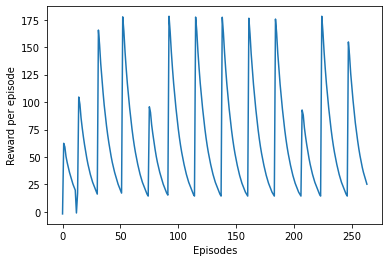

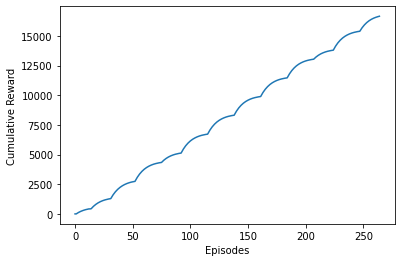

In [6]:
plt.plot(np.arange(len(np.diff(rewards))),np.diff(rewards))
plt.ylabel('Reward per episode')
plt.xlabel('Episodes')
plt.show()

plt.plot(np.arange(len(rewards)),rewards)
plt.ylabel('Cumulative Reward')
plt.xlabel('Episodes')
plt.show()

#### Global Rewards

In [8]:
global_reward=0 #intitial global reward
alpha=0.8 #learning rate

while not done:
    t=len(rewards)
    global_reward+=alpha*(current_reward-global_reward) #update global reward based on the current reward received
    T=global_reward #leaving threshold is equal to global reward
    p=exploit_or_explore(current_reward,T,c=0.5, beta=0.5) #get probabilitity of exploting 
    state, total_reward, done=select_action(p, type='global')
    rewards.append(total_reward)
    current_reward=rewards[-1]-rewards[-2]

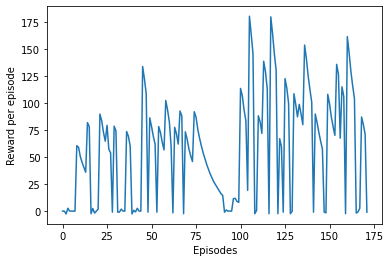

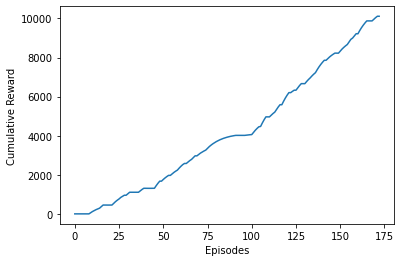

In [9]:
plt.plot(np.arange(len(np.diff(rewards))),np.diff(rewards))
plt.ylabel('Reward per episode')
plt.xlabel('Episodes')
plt.show()

plt.plot(np.arange(len(rewards)),rewards)
plt.ylabel('Cumulative Reward')
plt.xlabel('Episodes')
plt.show()

### Combined

In [11]:
start_reward=20 #intial local reward for all states
estimated_rewards=np.array([start_reward]*(env.action_space.n-1))
alpha=0.8 #learning rate
global_reward=0 #intitial global reward

while not done:
    estimated_rewards[state]= current_reward #change estimated reward only for current state
    global_reward+=alpha*(current_reward-global_reward) #update global reward based on the current reward received
    T=global_reward #leaving threshold is equal to global reward
    p=exploit_or_explore(current_reward,T,c=0.5, beta=0.5) #get probabilitity of exploting 
    state, total_reward, done=select_action(p, estimated_rewards)
    rewards.append(total_reward)
    current_reward=rewards[-1]-rewards[-2]

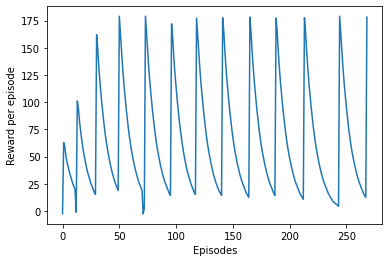

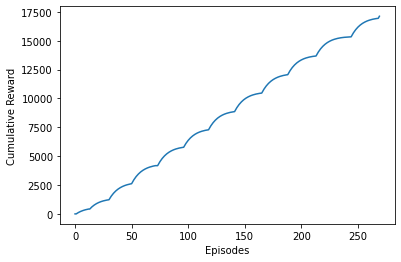

In [12]:
plt.plot(np.arange(len(np.diff(rewards))),np.diff(rewards))
plt.ylabel('Reward per episode')
plt.xlabel('Episodes')
plt.show()

plt.plot(np.arange(len(rewards)),rewards)
plt.ylabel('Cumulative Reward')
plt.xlabel('Episodes')
plt.show()